In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torchaudio
import random
import torch
import os

## 0. dataset loading

In [2]:
np.random.seed(42)

def load_data(real_audio_path, fake_audio_path, size):
    dataset_loaded= []
    real_audio_files= [os.path.join(real_audio_path, file) for file in os.listdir(real_audio_path) if file.endswith(('.wav'))][:int(size/2)]
    fake_audio_files= [os.path.join(fake_audio_path, file) for file in os.listdir(fake_audio_path) if file.endswith(('.wav'))][:int(size/2)]
    real_audio_labels= [1]*(len(real_audio_files))
    fake_audio_labels= [0]*(len(fake_audio_files))
    all_labels= real_audio_labels + fake_audio_labels
    all_dataset_files= real_audio_files + fake_audio_files
    all_dataset= list(zip(all_dataset_files, all_labels))
    random.shuffle(all_dataset)
    for item in all_dataset:
        try:
            file_path = item[0]
            label = item[1]
            y, sr = torchaudio.load(file_path)
            dataset_loaded.append((y, sr, label))
        except Exception as e:
            print(f"Skipping {item[0]}: {e}")
    return dataset_loaded

real_file_path= r"D:\f_uni\sophomore_Uni\semester_1\Profesinal_Project\multimodal_deepfake_detection\datasets\FoR_dataset\for-norm\for-norm\training\real"
fake_file_path= r"D:\f_uni\sophomore_Uni\semester_1\Profesinal_Project\multimodal_deepfake_detection\datasets\FoR_dataset\for-norm\for-norm\training\fake"

dataset= load_data(real_file_path,fake_file_path,1000)

## 1. Audio Channels
An audio channel represents a continuous stream of amplitude samples captured by one microphone over time.
* Mono: From one direction.
* Stereo: From 2 dirctions, left and right.
* N Channels: From N directions, (e.g. recording using 6 microphones)

In [3]:
total_channels= sum(i[0].shape[0] for i in dataset)
average_channels= total_channels / len(dataset)
average_channels

1.0

All audio files in this dataset are **Mono**

## 2. Sample Rate
The number of audio samples captured per second. 
Sample: Amplitude value at a certain time
* e.g. a sample rate of 160000 means 160000 samples are recorded every second

In [4]:
total_samples= sum(i[1] for i in dataset)
average_samples= total_samples / len(dataset)
average_samples

16000.0

## 3. Duration Analysis
$$ Duration= \frac{Number Of Samples}{Sample Rate} $$

Mean Duration: 3.100772
Max Duration: 10.039125
Min Duration: 0.265625


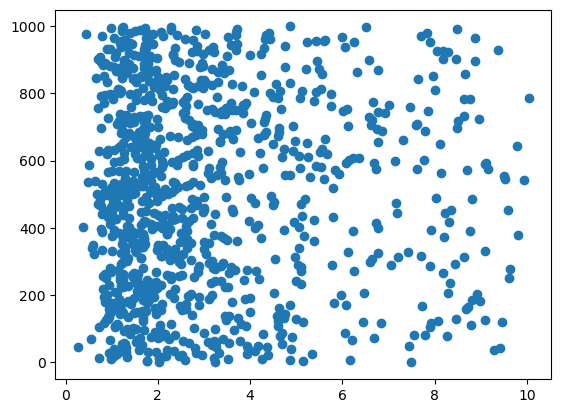

In [5]:
durations = [len(i[0][0]) / i[1] for i in dataset]
print(f"Mean Duration: {np.mean(durations)}\nMax Duration: {max(durations)}\nMin Duration: {min(durations)}")
plt.scatter(durations,range(0,len(dataset)));

In [6]:
# TODO: Test with length higher than 5

## 4. Root Mean Square Analysis
* It represents the average loudness of the sound over time.
$$ RMS= \sqrt {\frac{1}{N}\sum_{i=1}^{N}{x^2_i}}$$
$$X: Sample$$
$$N: Total Number Of Samples$$

Mean RMS: 0.1607830971479416
Max RMS: 0.45424145460128784
Min RMS: 0.055878058075904846


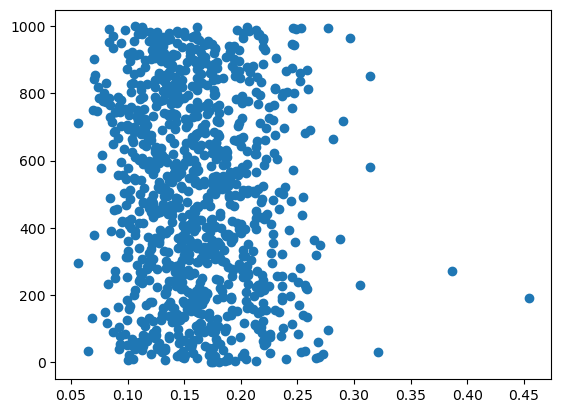

In [7]:
all_rms= [torch.sqrt(torch.mean(i[0] ** 2)) for i in dataset]
print(f"Mean RMS: {np.mean(all_rms)}\nMax RMS: {max(all_rms)}\nMin RMS: {min(all_rms)}")
plt.scatter(all_rms,range(0,len(dataset)));

In [8]:
# TODO: Remove Outliers and find paper that specifies RMS for typical speach and deepfake speach, to set the threshold